<a href="https://colab.research.google.com/github/syedokun/HAD7001/blob/main/Datathon_2/Datathon_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the Libraries and Datasets into workspace

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd


source_df = pd.read_csv('/content/Datathon #2 Heart Failure Mortality.csv')
source_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,hf_mortality
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## EDA and preprocessing

In [ ]:
missing_values = source_df.isnull().sum()
print(missing_values)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
hypertension                0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
hf_mortality                0
dtype: int64


In [ ]:
categorical_cols = ['anaemia', 'diabetes', 'hypertension', 'sex', 'smoking', 'hf_mortality']
for col in categorical_cols:
    source_df[col] = pd.Categorical(source_df[col])

In [ ]:
continuous_cols = [col for col in source_df.columns if col not in categorical_cols]

In [ ]:
description = source_df.describe()
description

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


### Checking distributions and handling outliers for continuous variables

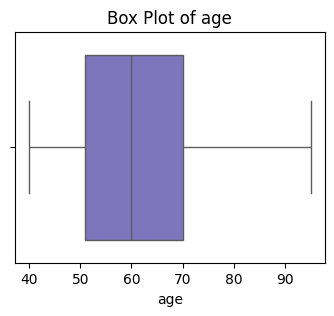

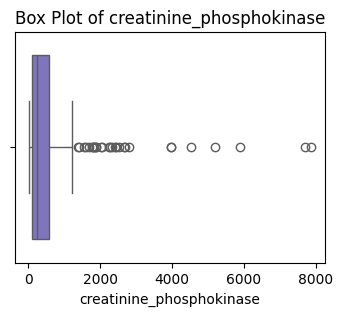

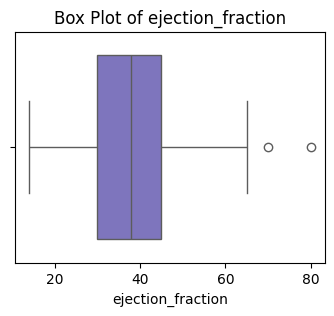

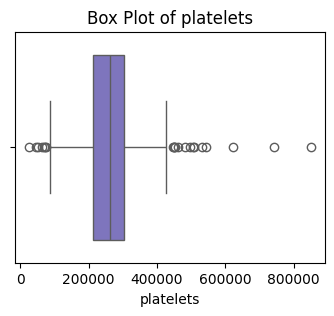

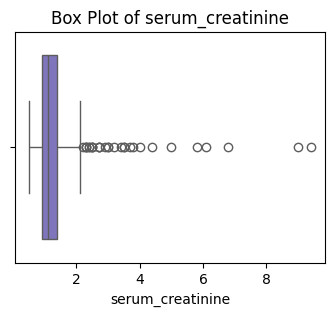

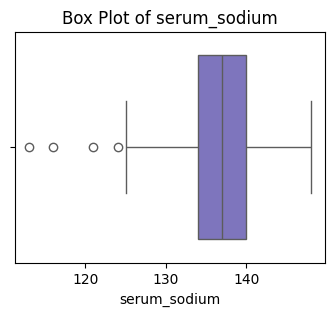

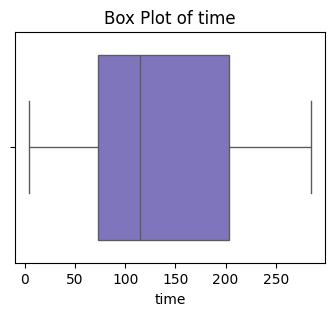

In [ ]:
for col in continuous_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=source_df[col], color='#7569c9')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
import pandas as pd

def calculate_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    num_outliers = len(outliers)

    return num_outliers

for col in continuous_cols:
    num_outliers = calculate_outliers(source_df, col)
    print(f"Number of outliers in {col}: {num_outliers}")

Number of outliers in age: 0
Number of outliers in creatinine_phosphokinase: 29
Number of outliers in ejection_fraction: 2
Number of outliers in platelets: 21
Number of outliers in serum_creatinine: 29
Number of outliers in serum_sodium: 4
Number of outliers in time: 0


In [ ]:
def remove_outliers(df, column_name):
    try:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
        num_outliers = len(outliers)

        df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
        print(f"Outliers removed from '{column_name}': {num_outliers}")
        return df_no_outliers

    except KeyError:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return df

In [ ]:
for col in continuous_cols:
    source_df = remove_outliers(source_df, col)

Outliers removed from 'age': 0
Outliers removed from 'creatinine_phosphokinase': 29
Outliers removed from 'ejection_fraction': 2
Outliers removed from 'platelets': 18
Outliers removed from 'serum_creatinine': 23
Outliers removed from 'serum_sodium': 3
Outliers removed from 'time': 0


### Checking summary stats for categorical variables

In [ ]:
for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Unique values: {source_df[col].unique()}")
    print(f"Value counts:\n{source_df[col].value_counts()}")
    print("-" * 20)

Column: anaemia
Unique values: [0, 1]
Categories (2, int64): [0, 1]
Value counts:
anaemia
0    119
1    105
Name: count, dtype: int64
--------------------
Column: diabetes
Unique values: [0, 1]
Categories (2, int64): [0, 1]
Value counts:
diabetes
0    130
1     94
Name: count, dtype: int64
--------------------
Column: hypertension
Unique values: [1, 0]
Categories (2, int64): [0, 1]
Value counts:
hypertension
0    139
1     85
Name: count, dtype: int64
--------------------
Column: sex
Unique values: [1, 0]
Categories (2, int64): [0, 1]
Value counts:
sex
1    144
0     80
Name: count, dtype: int64
--------------------
Column: smoking
Unique values: [0, 1]
Categories (2, int64): [0, 1]
Value counts:
smoking
0    152
1     72
Name: count, dtype: int64
--------------------
Column: hf_mortality
Unique values: [1, 0]
Categories (2, int64): [0, 1]
Value counts:
hf_mortality
0    163
1     61
Name: count, dtype: int64
--------------------


In [73]:
source_df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,60.809527,336.941964,38.178571,255865.190045,1.128571,137.044643,132.651786
std,11.946085,279.521085,11.710801,67153.749051,0.327794,3.806740,76.579770
min,40.000000,30.000000,14.000000,122000.000000,0.600000,125.000000,4.000000
25%,50.000000,114.500000,30.000000,210000.000000,0.900000,134.000000,75.750000
50%,60.000000,212.000000,38.000000,262500.000000,1.100000,137.000000,120.000000
75%,70.000000,582.000000,45.000000,297250.000000,1.300000,140.000000,205.000000
max,95.000000,1202.000000,65.000000,427000.000000,2.100000,148.000000,285.000000


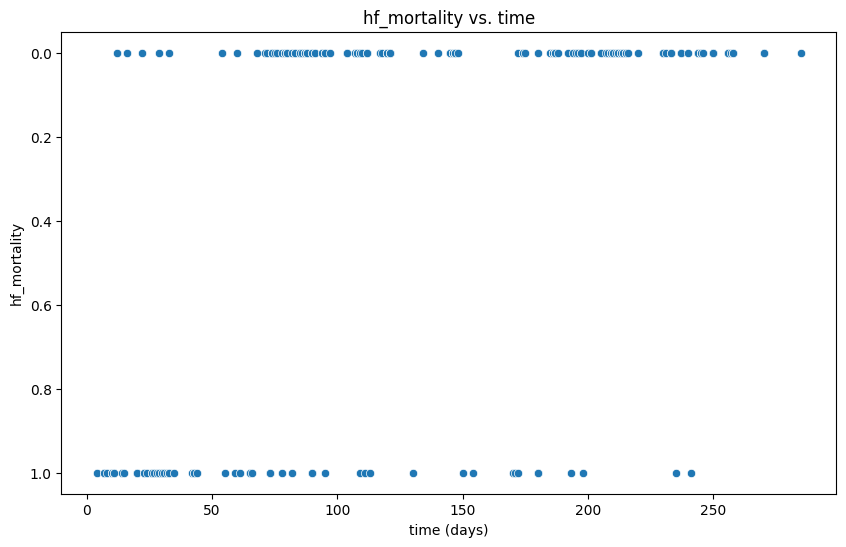

In [72]:

#create a 2d graph showing with time as X axis and hf_mortality as y axis

plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='time', y='hf_mortality', data=source_df)
plt.title("hf_mortality vs. time")
plt.xlabel("time (days)")
plt.ylabel("hf_mortality")
plt.show()

## Building the Log regressor

### Correlation study

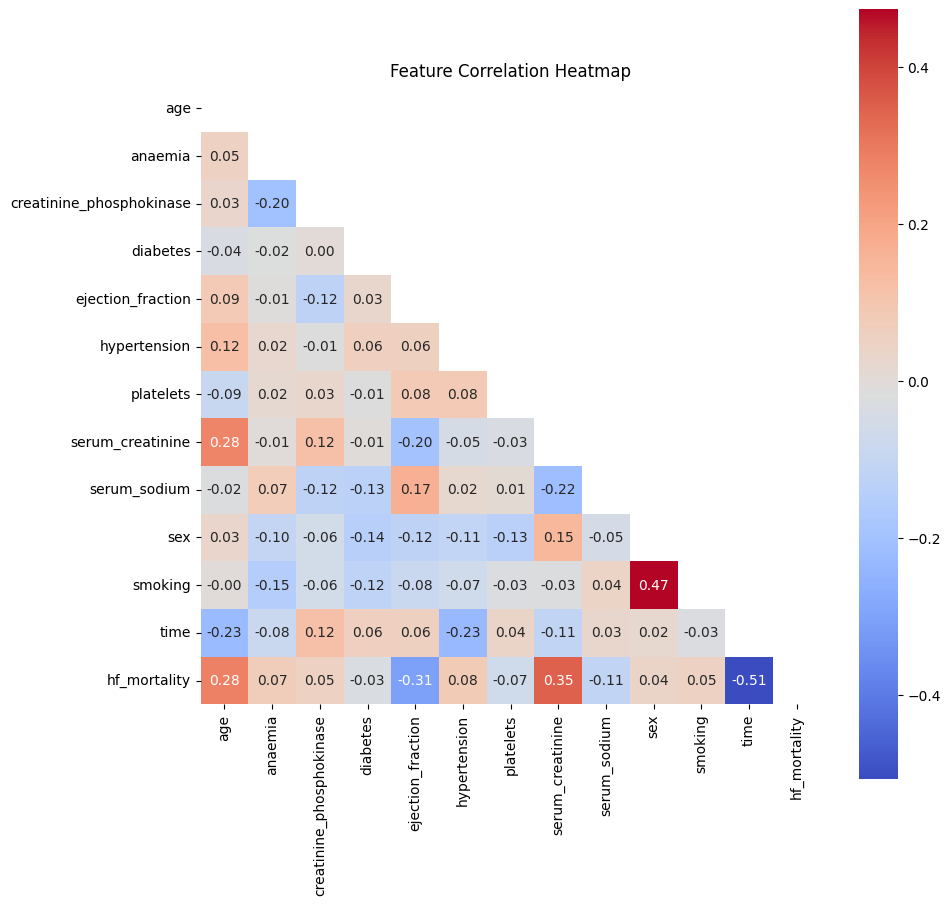

In [ ]:
corr_mtx = source_df.corr()
mask = np.triu(np.ones_like(corr_mtx, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

### Fitting a vanilla model

In [ ]:
X = source_df.drop('hf_mortality', axis=1)
y = source_df['hf_mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[32  2]
 [ 7  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.67      0.36      0.47        11

    accuracy                           0.80        45
   macro avg       0.74      0.65      0.67        45
weighted avg       0.78      0.80      0.78        45



In [ ]:
from sklearn.linear_model import LogisticRegressionCV

log_reg_cv = LogisticRegressionCV(penalty='elasticnet', solver='saga', cv=5, scoring='accuracy', random_state=42,l1_ratios=[0.1,0.3,0.5,0.7,0.9],Cs=10)
log_reg_cv.fit(X_train, y_train)
print(log_reg_cv.score(X_train, y_train))
print(log_reg_cv.score(X_test, y_test))
y_pred = log_reg_cv.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Best hyper parameters:", log_reg_cv.C_,log_reg_cv.l1_ratio_)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("ROC_AUC:", roc_auc_score(y_test, y_pred))

0.8491620111731844
0.8
Best hyper parameters: [0.35938137] [0.9]
Confusion Matrix:
[[32  2]
 [ 7  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.67      0.36      0.47        11

    accuracy                           0.80        45
   macro avg       0.74      0.65      0.67        45
weighted avg       0.78      0.80      0.78        45

ROC_AUC: 0.6524064171122995


### Doing a grid search for hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Doing a 5-fold CV on accuracy
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nROC AUC Score: {roc_auc}")

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8433333333333334
Confusion Matrix:
[[32  2]
 [ 6  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.71      0.45      0.56        11

    accuracy                           0.82        45
   macro avg       0.78      0.70      0.72        45
weighted avg       0.81      0.82      0.81        45


ROC AUC Score: 0.6978609625668449


## Calculating feature importances

In [ ]:
importances = best_log_reg.coef_[0]
feature_names = source_df.drop('hf_mortality', axis=1).columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
7,serum_creatinine,0.265135
0,age,0.041302
1,anaemia,0.000000
2,creatinine_phosphokinase,0.000000
3,diabetes,0.000000
5,hypertension,0.000000
6,platelets,0.000000
8,serum_sodium,0.000000
9,sex,0.000000
10,smoking,0.000000


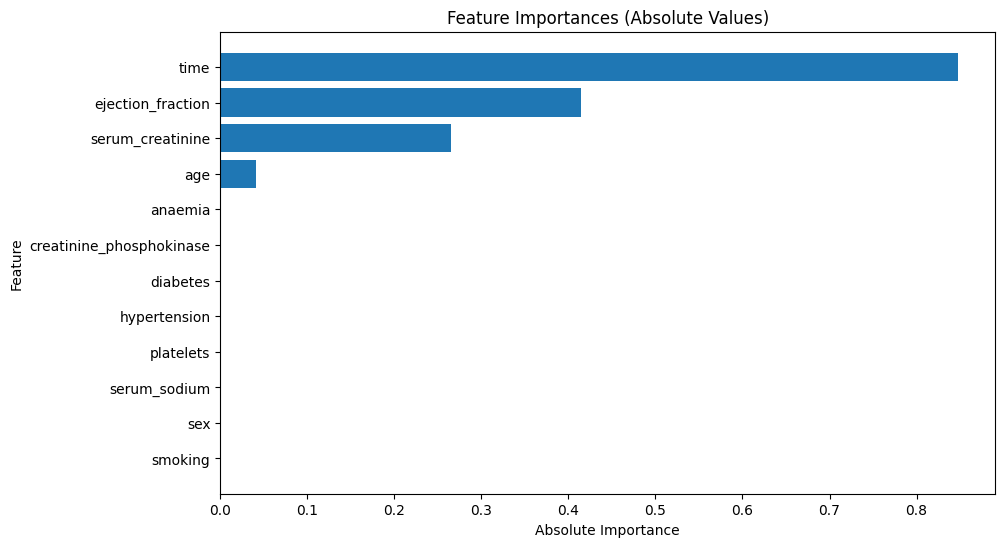

In [ ]:
# Calculate absolute values of importances
feature_importances['Absolute Importance'] = np.abs(feature_importances['Importance'])
feature_importances = feature_importances.sort_values(by='Absolute Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Absolute Importance'])
plt.xlabel("Absolute Importance")
plt.ylabel("Feature")
plt.title("Feature Importances (Absolute Values)")
plt.gca().invert_yaxis()
plt.show()